In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import re
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import unicodedata
import joblib
from transformers import CleanText, TokenizerText 

In [155]:
df = pd.read_csv('datos_productos.csv')

In [157]:
df

,Price,Star_Rating,Reviews,Product_Description,Tipo
0,6.95,4.4,477,"L'Oréal Men Expert Champú sólido para hombres,...",champu
1,11.99,4.2,455,Störtebekker® Premium Champú sólido Sándalo (1...,champu
2,14.99,5.0,12,Champú Sólido sin Parabenos ni Sulfatos-Vegano...,champu
3,11.99,4.4,64,RAW REVIVAL - Champú solido Romero | Anticaspa...,champu
4,11.99,4.4,24,Störtebekker® Premium Champú sólido Tortuga - ...,champu
...,...,...,...,...,...
390,21.50,5.0,2,Exfoliante Exfoliante de Bambú de Phyt's Men 1...,exfoliante
391,42.00,4.2,131,Paula’s Choice RESIST Antiedad 2% BHA Exfolian...,exfoliante
392,20.50,4.1,194,Himalaya Herbals Exfoliante de albaricoque 50 ...,exfoliante
393,70.52,4.3,649,Vasanti – Rejuvenecedor facial enzimático Brig...,exfoliante


# TF-IDF (NLP)

In [20]:
# Limpieza del texto 

In [22]:
# resultados = df[df['Product_Description'].str.contains(
#     r'\bmanteca\b', 
#     case=False, 
#     regex=True
# )]

# print(resultados)

In [88]:
def Clean_text(texto):
    if not isinstance(texto, str):
        return ""
    
    # Lista de términos compuestos (corregida)
    terminos_compuestos = [
        "acido salicilico",
        "acido hialuronico",
        "vitamina c",
        "aloe vera",
        "manteca de karite",
        "aceite almendras",
        "aceite argan",
        "aceite coco",
        "aceite ricino",
        "aceite jojoba",
        "aceite romero",
        "crecimiento capilar",
        "caida cabello"
    ]
    
    # Unir términos compuestos con guiones
    for termino in terminos_compuestos:
        texto = re.sub(
            r'\b' + re.escape(termino) + r'\b', 
            termino.replace(" ", "-"), 
            texto, 
            flags=re.IGNORECASE
        )
    
    # Limpieza estándar (conserva guiones)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)  # URLs
    texto = unicodedata.normalize("NFD", texto).encode("ascii", "ignore").decode("utf-8")  # Tildes
    texto = re.sub(r'@\w+|#\w+', '', texto)  # Menciones/hashtags
    texto = re.sub(r'[^\w\s-]', '', texto)  # Conserva guiones
    texto = re.sub(r'\b\d+\b', '', texto)  # Números sueltos
    texto = texto.lower().strip()  # Minúsculas y espacios
    
    return texto





In [90]:
def Tokenizer_text(texto):
    # Limpiar el texto
    texto_limpio = clean_text(texto)
    
    # Tokenizar (conserva guiones)
    tokens = texto_limpio.split()  # Split por espacios en lugar de word_tokenize
    
    # Filtrar stopwords en español
    stop_words = set(stopwords.words("spanish"))
    tokens = [token for token in tokens if token not in stop_words]
    

    # # Aplicar stemming (reducción a raíz)
    # stemmer = SnowballStemmer("spanish")
    # tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [28]:
df['clean_description'] = df['Product_Description'].apply(clean_text)

In [30]:
# Crear el vectorizador con stemming
tfidf = TfidfVectorizer(
    tokenizer=procesar_texto,
    max_features=800
)

# Ajustar y transformar
X_tfidf = tfidf.fit_transform(df['clean_description'])

# Ver las palabras clave seleccionadas
feature_names = tfidf.get_feature_names_out()
print("Palabras clave:", feature_names)

A:\anaconda\envs\py11_env\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Palabras clave: ['-' '500ml' 'absorbe' 'absorcion' 'abundante' 'accion' 'aceite' 'aceites'
 'acerca' 'acid' 'acido' 'acido-salicilico' 'acidos' 'aclara' 'aclarar'
 'acne' 'acondicionador' 'activado' 'activo' 'activos' 'actua' 'actuar'
 'adecuada' 'adecuado' 'ademas' 'adios' 'afectado' 'afeitado' 'agentes'
 'agradable' 'agresivos' 'agua' 'aha' 'ahorra' 'aire' 'alcance' 'alcohol'
 'alemania' 'alguna' 'alivio' 'almendras' 'almohadillas' 'aloe-vera'
 'alpecin' 'alta' 'altamente' 'ambiente' 'amoniaco' 'and' 'animal'
 'animales' 'anos' 'anti' 'anticaida' 'anticaspa' 'antioxidante'
 'antioxidantes' 'aparicion' 'apariencia' 'aplica' 'aplicacion' 'aplicar'
 'aplique' 'aporta' 'apto' 'aqua' 'arbol' 'arcilla' 'area' 'argan' 'aroma'
 'aromas' 'arroz' 'arrugas' 'asegurando' 'asi' 'aspecto' 'aumenta'
 'avanzada' 'ayuda' 'ayudan' 'ayudando' 'ayudar' 'azucar' 'b5' 'bajo'
 'bambu' 'bano' 'bar' 'barba' 'barra' 'barrera' 'base' 'belleza'
 'beneficios' 'benzoate' 'betaine' 'bha' 'bien' 'bienestar' 'bio'
 

In [33]:
import pandas as pd

# Obtener las palabras clave y sus puntuaciones
feature_names = tfidf.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1  # Suma de TF-IDF por palabra

# Crear un DataFrame con palabras y sus puntuaciones
tfidf_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})

# Ordenar por puntuación descendente
top_words = tfidf_df.sort_values(by='score', ascending=False)

# Seleccionar las N palabras más importantes
top_n = 300
palabras_seleccionadas = top_words['word'].head(top_n).tolist()

print("Palabras seleccionadas:", palabras_seleccionadas)

Palabras seleccionadas: ['cabello', 'champu', 'piel', 'jabon', 'exfoliante', '-', 'mas', 'facial', 'natural', 'cuero', 'cabelludo', 'aceite', 'suave', 'producto', 'solido', 'ingredientes', 'color', 'naturales', 'uso', 'cuidado', 'hombre', 'tinte', 'limpieza', 'gel', 'hombres', 'limpia', 'ducha', 'pelo', 'productos', 'ml', 'espuma', 'detalles', 'barba', 'ver', 'formula', 'pieles', 'acerca', 'solo', 'corporal', 'agua', 'minutos', 'poros', 'puede', 'negro', 'crecimiento', 'mano', 'suavemente', 'usar', 'cuerpo', 'tambien', 'ayuda', 'caida', 'manos', 'sodium', 'contiene', 'facil', 'parabenos', 'barra', 'elimina', 'acido', 'extracto', 'tipo', 'ideal', 'limpiador', 'celulas', 'alpecin', 'anticaida', 'hecho', 'grasa', 'vegano', 'descripcion', 'ojos', 'canas', 'efecto', 'caspa', 'aceites', 'negros', 'gris', 'cada', 'cara', 'carbon', 'puntos', 'sulfatos', 'fragancia', 'bien', 'profunda', 'cabellos', 'rostro', 'si', 'organico', 'calidad', 'tenir', 'gracias', 'plastico', 'crema', 'diario', 'perfec

In [36]:
# from nltk.stem import SnowballStemmer

# # Stemmer para español
# stemmer = SnowballStemmer("spanish")

# # Lista de términos compuestos que NO deben stemmizarse
# terminos_compuestos = [
#     'acido-salicilico', 'aloe-vera', 'manteca-de-karite', 'vitamina-c'
# ]

# def stemmizar_palabra(palabra):
#     # Si la palabra es un término compuesto, no la stemmices
#     if palabra in terminos_compuestos:
#         return palabra
#     # Si contiene guiones, stemmiza cada parte por separado
#     elif '-' in palabra:
#         partes = palabra.split('-')
#         return '-'.join([stemmer.stem(p) for p in partes])
#     # Si es una palabra normal, stemmízala
#     else:
#         return stemmer.stem(palabra)

# # Stemmizar todas las palabras
# palabras_stemmizadas = [stemmizar_palabra(palabra) for palabra in palabras_dominio + ingredientes_dominio]

# print(palabras_stemmizadas)

# PREPROCESSOR.PKL

In [95]:
# import nltk
# nltk.download('stopwords')

In [162]:
import re
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from joblib import dump
from transformers import CleanText, TokenizerText 
import numpy as np
import pandas as pd

# Definir vocabulario
palabras_dominio = ['cabello','piel','facial','natural','tinte','pelo','corporal','barba',
                   'crecimiento','cuerpo','caida','parabenos','anticaida','vegano','canas','cara','fragancia',
                   'organico','afeitado','aroma','coloracion','delicada','ecologico','exfoliante','acne',
                   'fortalecer','graso','hidrata','poros','tradicionales','marina']

ingredientes_dominio = ['acido-salicilico','almendras','aloe-vera','aceites','carbon','antioxidante','arcilla','argan',
                       'cafe','cafeina','citric','coco','curcuma','esencial','ginseng','glicerina','jengibre','jojoba',
                       'karite','manteca-de-karite','menta','minerales','oliva','parfum','ricino','romero','rosa','sal','sandalo','zinc',
                       'canela','vitamina-c','madera','mango']

vocabulario = palabras_dominio + ingredientes_dominio


# Crear el preprocesador
def create_preprocessor():
    text_pipeline = Pipeline([
        ('cleaner', CleanText()),
        ('tokenizer', TokenizerText()),
        ('tfidf', TfidfVectorizer(vocabulary=vocabulario))
    ])

    preprocessor = ColumnTransformer([
        ('tipo', OneHotEncoder(drop='first'), ['Tipo']),
        ('descripcion', text_pipeline, 'Product_Description'),
        ('numeric', FunctionTransformer(np.log1p, validate=False), ['Price'])
    ])

    return preprocessor


# Crear y guardar el preprocesador
if __name__ == "__main__":
    


    # Asegurarse de que todos los valores sean cadenas
    # Validar Product_Description
    df['Product_Description'] = df['Product_Description'].apply(
        lambda x: ' '.join(x) if isinstance(x, list) else str(x).strip()
    )
    df = df[df['Product_Description'].str.strip() != ""]

    # Validar Price
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df = df[df['Price'] > 0]
    # Crear preprocesador
    preprocessor = create_preprocessor()

    # Ajustar preprocesador al DataFrame
    preprocessor.fit(df)

    # Guardar preprocesador
    dump(preprocessor, 'preprocessor.pkl')

    print("Preprocesador creado y guardado correctamente.")

Preprocesador creado y guardado correctamente.


In [167]:
preprocessor

ColumnTransformer(transformers=[('tipo', OneHotEncoder(drop='first'), ['Tipo']),
                                ('descripcion',
                                 Pipeline(steps=[('cleaner', CleanText()),
                                                 ('tokenizer', TokenizerText()),
                                                 ('tfidf',
                                                  TfidfVectorizer(vocabulary=['cabello',
                                                                              'piel',
                                                                              'facial',
                                                                              'natural',
                                                                              'tinte',
                                                                              'pelo',
                                                                              'corporal',
                                                                              'barba',
                                                                              'crecimiento',
                                                                              'cuerpo',
                                                                              'caida',
                                                                              'parabenos',
                                                                              'anticaida',
                                                                              'vegano',
                                                                              'canas',
                                                                              'cara',
                                                                              'fragancia',
                                                                              'organico',
                                                                              'afeitado',
                                                                              'aroma',
                                                                              'coloracion',
                                                                              'delicada',
                                                                              'ecologico',
                                                                              'exfoliante',
                                                                              'acne',
                                                                              'fortalecer',
                                                                              'graso',
                                                                              'hidrata',
                                                                              'poros',
                                                                              'tradicionales', ...]))]),
                                 'Product_Description'),
                                ('numeric',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Price'])])

# PCA (palabras clave e ingredientes)

In [ ]:
vocabulario = ['cabello','piel','facial','natural','tinte','pelo','corporal','barba',
                    'crecimiento','cuerpo','caida','parabenos','anticaida','vegano','canas','cara','fragancia',
                    'organico','afeitado','aroma','coloracion','delicada','diaria','ecologico','exfoliante','acne',
                    'fortalecer','graso','hidrata','poros','tradicionales','acido-salicilico','almendras','aloe-vera','aceites','carbon','antioxidante','arcilla','argan',
                      'cafe','cafeina','citric','coco','curcuma','esencial','ginseng','glicerina','jengibre','jojoba',
                      'karite','manteca-de-karite','menta','minerales','oliva','parfum','ricino','romero','rosa','sal','sandalo','zinc',
                      'canela','vitamina-c']

In [43]:
# Ejemplo: Filtrar palabras clave basadas en su importancia
from sklearn.feature_selection import SelectKBest, f_classif

# Calcular la importancia de cada palabra clave
selector = SelectKBest(score_func=f_classif, k=30)  # Selecciona las 30 palabras más importantes
X_selected = selector.fit_transform(X_tfidf, df['Star_Rating'])

# Obtener las palabras seleccionadas
selected_features = np.array(vocabulario)[selector.get_support()]
print("Palabras clave seleccionadas:", selected_features)

Palabras clave seleccionadas: ['cabello' 'piel' 'facial' 'natural' 'tinte' 'pelo' 'corporal' 'barba'
 'crecimiento' 'parabenos' 'vegano' 'canas' 'organico' 'afeitado'
 'delicada' 'ecologico' 'exfoliante' 'fortalecer' 'poros' 'tradicionales'
 'aceites' 'antioxidante' 'cafeina' 'citric' 'coco' 'ginseng' 'karite'
 'parfum' 'ricino' 'sal']


A:\anaconda\envs\py11_env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
A:\anaconda\envs\py11_env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


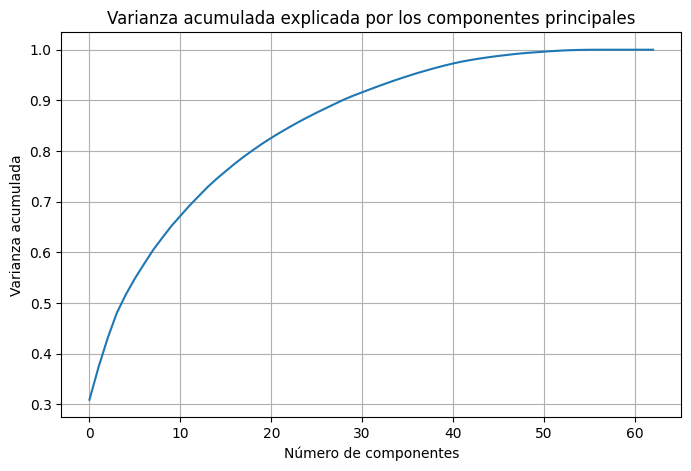

In [45]:
# Explorar la varianza acumulada
pca_full = PCA()
pca_full.fit(X_tfidf.toarray())

# Gráfica de la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada explicada por los componentes principales')
plt.grid(True)
plt.show()

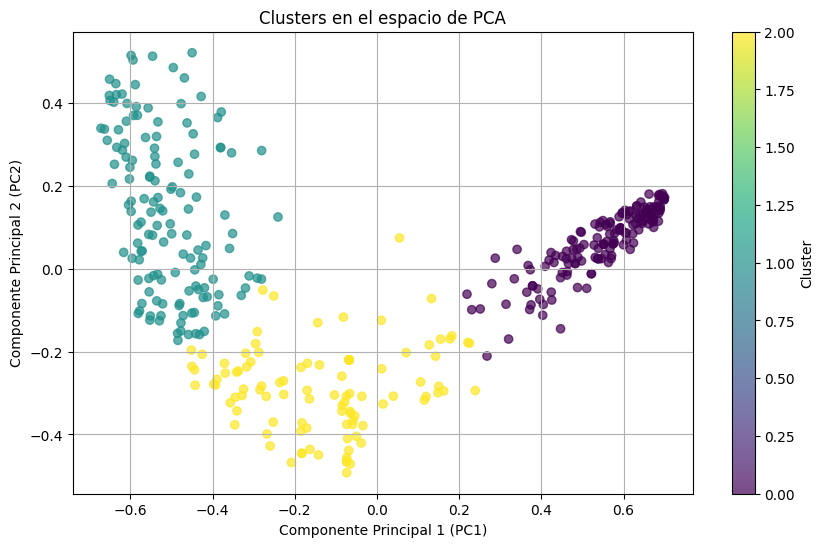

In [47]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 3 clusters (por ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualizar clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('Clusters en el espacio de PCA')
plt.grid(True)
plt.show()

In [51]:
# Obtener los pesos de las palabras clave en los componentes principales
component_weights = pd.DataFrame(
    pca.components_,
    columns=vocabulario,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Mostrar las palabras más influyentes en cada componente
print("Palabras más influyentes en cada componente:")
print(component_weights.apply(lambda x: x.abs().nlargest(5), axis=1))

Palabras más influyentes en cada componente:
        barba   cabello    cuerpo  exfoliante    facial      piel     poros
PC1       NaN  0.763999       NaN    0.312790  0.218055  0.457863  0.103892
PC2  0.228763  0.395623  0.205497    0.512243  0.542105       NaN       NaN


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Star_Rating'], test_size=0.2, random_state=42)

# Entrenar un modelo de regresión
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

Error Cuadrático Medio (MSE): 0.63


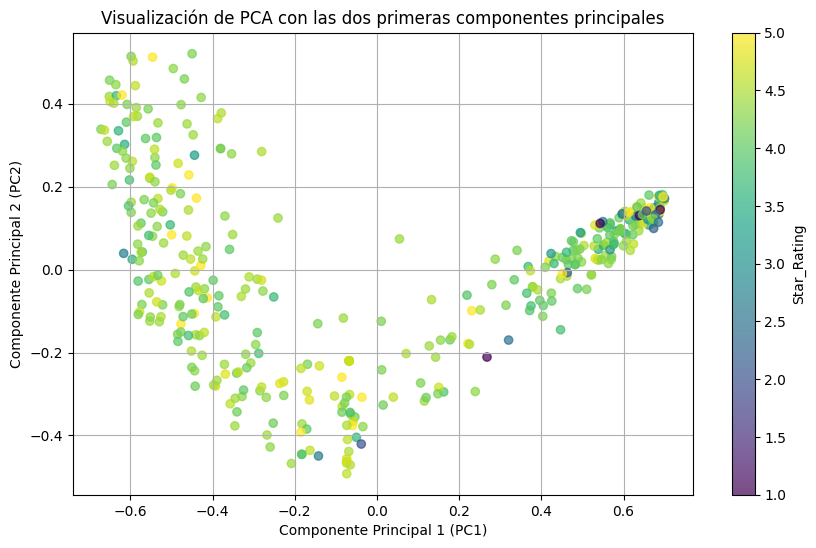

Varianza explicada por cada componente:
[0.30919817 0.06437136]


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('datos_productos.csv')

# Preprocesamiento con TF-IDF
vocabulario = ['cabello','piel','facial','natural','tinte','pelo','corporal','barba',
                    'crecimiento','cuerpo','caida','parabenos','anticaida','vegano','canas','cara','fragancia',
                    'organico','afeitado','aroma','coloracion','delicada','diaria','ecologico','exfoliante','acne',
                    'fortalecer','graso','hidrata','poros','tradicionales','acido-salicilico','almendras','aloe-vera','aceites','carbon','antioxidante','arcilla','argan',
                      'cafe','cafeina','citric','coco','curcuma','esencial','ginseng','glicerina','jengibre','jojoba',
                      'karite','manteca-de-karite','menta','minerales','oliva','parfum','ricino','romero','rosa','sal','sandalo','zinc',
                      'canela','vitamina-c']


tfidf = TfidfVectorizer(vocabulary=vocabulario)
X_tfidf = tfidf.fit_transform(df['Product_Description'])

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X_pca = pca.fit_transform(X_tfidf.toarray())

# Crear un DataFrame para visualizar los resultados
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Star_Rating'] = df['Star_Rating']  # Agregar la variable objetivo

# Gráfica de los datos proyectados en las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Star_Rating'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Star_Rating')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('Visualización de PCA con las dos primeras componentes principales')
plt.grid(True)
plt.show()

# Explicar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
